In [63]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six
from imblearn.over_sampling import SMOTE  # Import SMOTE

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier


#1- Data Gathering



In [64]:
Application_record =pd.read_csv("/content/application_record.csv")
Credit_record = pd.read_csv("/content/credit_record.csv")

# 2- Data Assessing




In [65]:
Application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [66]:
Credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [67]:
Application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [68]:
Application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [69]:
Application_record.duplicated().any()

False

In [70]:
Application_record.isna().any()

,0
ID,False
CODE_GENDER,False
FLAG_OWN_CAR,False
FLAG_OWN_REALTY,False
CNT_CHILDREN,False
AMT_INCOME_TOTAL,False
NAME_INCOME_TYPE,False
NAME_EDUCATION_TYPE,False
NAME_FAMILY_STATUS,False
NAME_HOUSING_TYPE,False


In [71]:
for i in Application_record.columns:
  print(Application_record[i].value_counts(),"\n")

ID
7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: count, Length: 438510, dtype: int64 

CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64 

FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64 

FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64 

CNT_CHILDREN
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: count, dtype: int64 

AMT_INCOME_TOTAL
135000.0    46879
157500.0    39768
180000.0    37912
112500.0    36979
225000.0    34130
            ...  
151425.0        1
133461.0        1
265950.0        1
201150.0        1
36679.5         1
Name: count, Length: 866, dtype: int64 

NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student            

In [72]:
Application_record[Application_record.OCCUPATION_TYPE.isna()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [73]:
Application_record[Application_record.CNT_CHILDREN> 8]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
20441,5061207,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0
20442,5061210,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0
20443,5061211,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,1,0,0,0,Drivers,15.0
36388,5105054,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,1,0,Waiters/barmen staff,20.0
79645,5307273,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
79646,5307274,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
79647,5372460,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
79648,5372461,M,Y,N,9,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-14718,-5011,1,1,0,0,Drivers,11.0
208909,5931568,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14.0
208910,5931569,F,N,Y,12,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14093,-2710,1,0,0,0,Core staff,14.0


In [74]:
Credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [75]:
Credit_record.isna().any()

,0
ID,False
MONTHS_BALANCE,False
STATUS,False


In [76]:
Credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [77]:
Credit_record.value_counts()

ID       MONTHS_BALANCE  STATUS
5001711  -3              0         1
5095326  -2              C         1
         -15             C         1
         -14             C         1
         -13             C         1
                                  ..
5037304  -6              C         1
         -5              C         1
         -4              C         1
         -3              C         1
5150487   0              C         1
Name: count, Length: 1048575, dtype: int64

In [78]:
Credit_record.duplicated().any()

False

In [79]:
from collections import Counter
#good or bad criteria I will assign for each value a socre and take the arvrage or sum whether will give me the best accurecy I will take it
#note the X does not give me any meaning but i think it doesn't give any meaning so I choose to drop it in this stage

def calculate_score_sum(status_list):
    score = 0
    for status in status_list:
        if status == 'C':
            score -= 1
        elif status == '0':
            score += 0
        elif status == '1':
            score += 1
        elif status == '2':
            score += 2
        elif status == '3':
            score += 3
        elif status == '4':
            score += 4
        elif status == '5':
            score += 5
    return score


def calculate_score_avr(status_list):
    score = 0
    counter=0
    for status in status_list:
        counter+=1
        if status == 'C':
            score -= 1
        elif status == '0':
            score += 0
        elif status == '1':
            score += 1
        elif status == '2':
            score += 2
        elif status == '3':
            score += 3
        elif status == '4':
            score += 4
        elif status == '5':
            score += 5
    return score/counter


#drop the X values
credit_record_filtered = Credit_record[Credit_record['STATUS'] != 'X']


In [80]:
# Group by client ID and calculate scores
client_scores_AVR = credit_record_filtered.groupby('ID')['STATUS'].apply(calculate_score_avr).reset_index()
client_scores_AVR

,ID,STATUS
0,5001711,0.000000
1,5001712,-0.473684
2,5001717,-0.227273
3,5001718,-0.034483
4,5001719,-0.953488
...,...,...
41444,5150480,-0.769231
41445,5150482,-0.333333
41446,5150484,-0.076923
41447,5150485,0.000000


In [81]:
client_scores_AVR.describe()

,ID,STATUS
count,4.144900e+04,41449.000000
mean,5.070284e+06,-0.337197
std,4.531360e+04,0.428593
min,5.001711e+06,-1.000000
25%,5.026498e+06,-0.739130
50%,5.065753e+06,-0.250000
75%,5.114045e+06,0.000000
max,5.150487e+06,5.000000


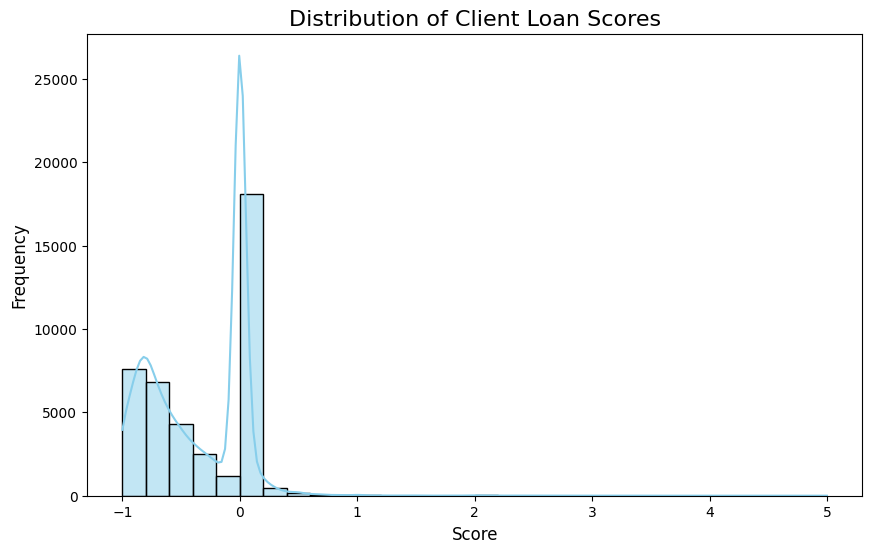

In [82]:
plt.figure(figsize=(10, 6))

# Plotting histogram with KDE
sns.histplot(client_scores_AVR['STATUS'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Client Loan Scores', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [83]:
#do the same fo sum
client_scores_sum = credit_record_filtered.groupby('ID')['STATUS'].apply(calculate_score_sum).reset_index()
client_scores_sum

,ID,STATUS
0,5001711,0
1,5001712,-9
2,5001717,-5
3,5001718,-1
4,5001719,-41
...,...,...
41444,5150480,-20
41445,5150482,-6
41446,5150484,-1
41447,5150485,0


In [84]:
client_scores_sum.describe()

,ID,STATUS
count,4.144900e+04,41449.000000
mean,5.070284e+06,-10.106106
std,4.531360e+04,14.935451
min,5.001711e+06,-60.000000
25%,5.026498e+06,-18.000000
50%,5.065753e+06,-3.000000
75%,5.114045e+06,0.000000
max,5.150487e+06,240.000000


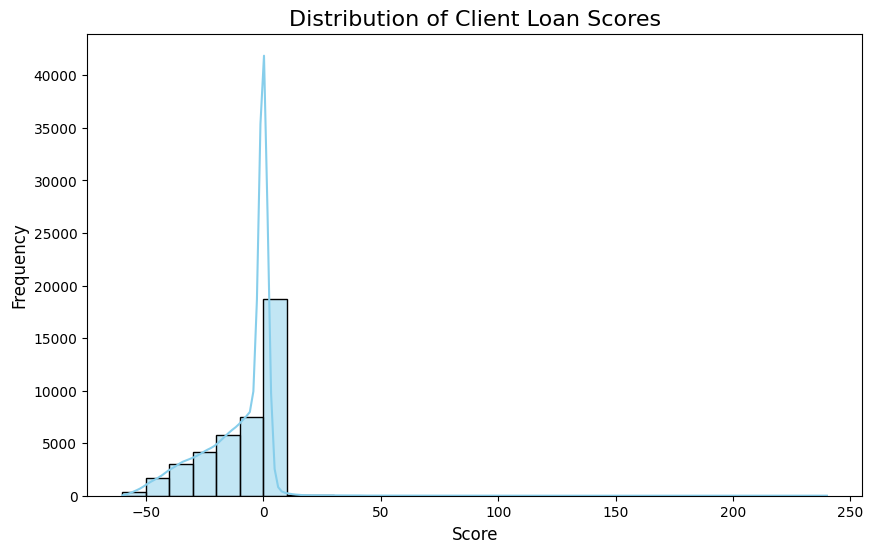

In [85]:
plt.figure(figsize=(10, 6))

sns.histplot(client_scores_sum['STATUS'], kde=True, bins=30, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Distribution of Client Loan Scores', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [86]:
# it dosent give me a full vision but i will choose the avrage for now and the throthould will be -0.250000 median approch
# then 0
# 0.1
# 0.13
#0.07
#0.08
#0.1
client_scores_AVR['label'] = client_scores_AVR['STATUS'].apply(lambda x: 'Bad' if x > 0.1 else 'Good')
client_scores_AVR = client_scores_AVR.drop(columns=['STATUS'])
client_scores_AVR['label'].value_counts()

,count
label,
Good,39770
Bad,1679


In [87]:
# i merged left and right merge but some id is not common so i choosed the inner to avoid any null values in label


merged_df = pd.merge(Application_record, client_scores_AVR, on='ID', how='inner')

# Display the merged DataFrame
print(merged_df.head())

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008810           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

In [88]:
merged_df.label.value_counts()

,count
label,
Good,31689
Bad,1421


In [89]:
merged_df.label.isna().sum()

0

In [90]:
# Perform one-hot encoding for categorical columns
categorical_columns = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE'
]

# Apply one-hot encoding
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True)

# Display the resulting DataFrame
print(merged_df_encoded.head())


        ID  CNT_CHILDREN  AMT_INCOME_TOTAL  DAYS_BIRTH  DAYS_EMPLOYED  \
0  5008804             0          427500.0      -12005          -4542   
1  5008805             0          427500.0      -12005          -4542   
2  5008806             0          112500.0      -21474          -1134   
3  5008808             0          270000.0      -19110          -3051   
4  5008810             0          270000.0      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  ...  \
0           1                1           0           0              2.0  ...   
1           1                1           0           0              2.0  ...   
2           1                0           0           0              2.0  ...   
3           1                0           1           1              1.0  ...   
4           1                0           1           1              1.0  ...   

  OCCUPATION_TYPE_Laborers  OCCUPATION_TYPE_Low-skill Laborers  \
0             

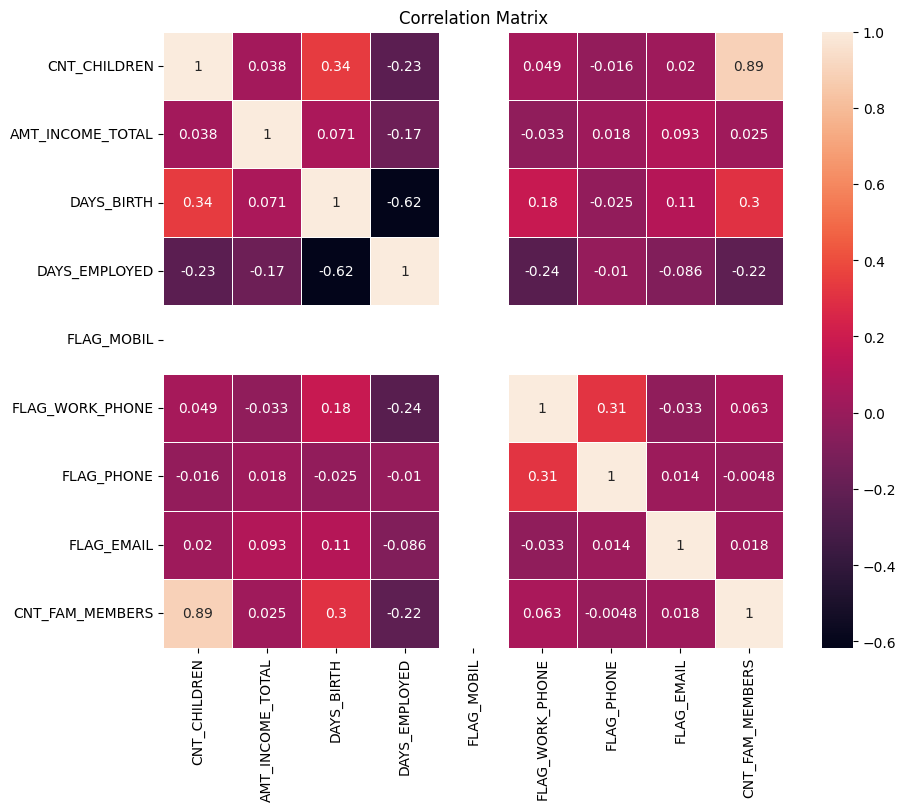

In [91]:
#drop the ID col
merged_df =merged_df.drop(columns=['ID'])

numeric_df = merged_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

In [92]:


ros= RandomOverSampler()
oversample = SMOTE()

# Drop non-important features based on the feature importance
X = merged_df_encoded.drop(columns=[ "ID",'label', 'FLAG_MOBIL', 'NAME_INCOME_TYPE_Student',
                                    'OCCUPATION_TYPE_Low-skill Laborers', 'OCCUPATION_TYPE_Secretaries',
                                    'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_IT staff',
                                    'OCCUPATION_TYPE_Realty agents'])
y = merged_df_encoded['label']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
X_train,Y_train =  oversample.fit_resample(X_train,Y_train)
X_test,Y_test = oversample.fit_resample(X_test,Y_test)

In [93]:
print(Counter(Y_train))
print(Counter(Y_test))


Counter({'Good': 25352, 'Bad': 25352})
Counter({'Good': 6337, 'Bad': 6337})


In [94]:


# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, Y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print(confusion_matrix(Y_test, y_pred_logreg))
print(classification_report(Y_test, y_pred_logreg))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
[[5415  922]
 [1169 5168]]
              precision    recall  f1-score   support

         Bad       0.82      0.85      0.84      6337
        Good       0.85      0.82      0.83      6337

    accuracy                           0.84     12674
   macro avg       0.84      0.84      0.83     12674
weighted avg       0.84      0.84      0.83     12674



In [95]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model (you can change the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(X_train, Y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Results:")
print(confusion_matrix(Y_test, y_pred_knn))
print(classification_report(Y_test, y_pred_knn))


K-Nearest Neighbors Results:
[[3147 3190]
 [ 659 5678]]
              precision    recall  f1-score   support

         Bad       0.83      0.50      0.62      6337
        Good       0.64      0.90      0.75      6337

    accuracy                           0.70     12674
   macro avg       0.73      0.70      0.68     12674
weighted avg       0.73      0.70      0.68     12674



In [96]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, Y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Decision Tree Results:")
print(confusion_matrix(Y_test, y_pred_dt))
print(classification_report(Y_test, y_pred_dt))


Decision Tree Results:
[[5189 1148]
 [ 220 6117]]
              precision    recall  f1-score   support

         Bad       0.96      0.82      0.88      6337
        Good       0.84      0.97      0.90      6337

    accuracy                           0.89     12674
   macro avg       0.90      0.89      0.89     12674
weighted avg       0.90      0.89      0.89     12674



In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, Y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print(confusion_matrix(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))

# Print feature importances sorted in descending order
print("\nFeature Importances (Sorted):")
feature_importances = rf.feature_importances_

# Create a list of tuples (feature, importance) and sort it
sorted_features = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print the sorted features and their importance
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


Random Forest Results:
[[5188 1149]
 [ 115 6222]]
              precision    recall  f1-score   support

         Bad       0.98      0.82      0.89      6337
        Good       0.84      0.98      0.91      6337

    accuracy                           0.90     12674
   macro avg       0.91      0.90      0.90     12674
weighted avg       0.91      0.90      0.90     12674


Feature Importances (Sorted):
DAYS_BIRTH: 0.1331
CNT_FAM_MEMBERS: 0.1223
AMT_INCOME_TOTAL: 0.1094
DAYS_EMPLOYED: 0.0865
NAME_EDUCATION_TYPE_Higher education: 0.0521
NAME_EDUCATION_TYPE_Secondary / secondary special: 0.0410
NAME_FAMILY_STATUS_Single / not married: 0.0381
NAME_FAMILY_STATUS_Married: 0.0334
CNT_CHILDREN: 0.0302
CODE_GENDER_M: 0.0295
FLAG_PHONE: 0.0271
NAME_INCOME_TYPE_Working: 0.0231
FLAG_OWN_REALTY_Y: 0.0231
FLAG_OWN_CAR_Y: 0.0210
FLAG_WORK_PHONE: 0.0185
OCCUPATION_TYPE_Laborers: 0.0173
OCCUPATION_TYPE_Managers: 0.0157
OCCUPATION_TYPE_Core staff: 0.0155
OCCUPATION_TYPE_Sales staff: 0.0141
NAME_INCOME

In [98]:
 ### all features and i choosed to drop the low correlation features

 #Feature Importances (Sorted):
# DAYS_BIRTH: 0.2282
# DAYS_EMPLOYED: 0.1607
# AMT_INCOME_TOTAL: 0.1606
# CNT_FAM_MEMBERS: 0.0341
# FLAG_PHONE: 0.0288
# FLAG_OWN_CAR_Y: 0.0263
# CNT_CHILDREN: 0.0261
# NAME_INCOME_TYPE_Working: 0.0255
# CODE_GENDER_M: 0.0250
# FLAG_OWN_REALTY_Y: 0.0242
# FLAG_WORK_PHONE: 0.0222
# NAME_FAMILY_STATUS_Married: 0.0182
# OCCUPATION_TYPE_Laborers: 0.0160
# NAME_EDUCATION_TYPE_Secondary / secondary special: 0.0145
# NAME_EDUCATION_TYPE_Higher education: 0.0141
# OCCUPATION_TYPE_Sales staff: 0.0133
# OCCUPATION_TYPE_Core staff: 0.0133
# FLAG_EMAIL: 0.0125
# NAME_HOUSING_TYPE_House / apartment: 0.0114
# NAME_INCOME_TYPE_State servant: 0.0112
# OCCUPATION_TYPE_Managers: 0.0106
# NAME_FAMILY_STATUS_Single / not married: 0.0104
# OCCUPATION_TYPE_Drivers: 0.0087
# OCCUPATION_TYPE_High skill tech staff: 0.0084
# NAME_FAMILY_STATUS_Separated: 0.0080
# OCCUPATION_TYPE_Medicine staff: 0.0070
# NAME_HOUSING_TYPE_With parents: 0.0070
# NAME_EDUCATION_TYPE_Incomplete higher: 0.0061
# NAME_HOUSING_TYPE_Municipal apartment: 0.0057
# NAME_INCOME_TYPE_Pensioner: 0.0048
# OCCUPATION_TYPE_Security staff: 0.0046
# NAME_FAMILY_STATUS_Widow: 0.0045
# OCCUPATION_TYPE_Cooking staff: 0.0045
# OCCUPATION_TYPE_Cleaning staff: 0.0036
# NAME_HOUSING_TYPE_Rented apartment: 0.0036
# NAME_EDUCATION_TYPE_Lower secondary: 0.0028
# OCCUPATION_TYPE_Private service staff: 0.0025
# OCCUPATION_TYPE_Waiters/barmen staff: 0.0023
# NAME_HOUSING_TYPE_Office apartment: 0.0022
# OCCUPATION_TYPE_Low-skill Laborers: 0.0018
# OCCUPATION_TYPE_Secretaries: 0.0016
# OCCUPATION_TYPE_HR staff: 0.0012
# OCCUPATION_TYPE_IT staff: 0.0010
# OCCUPATION_TYPE_Realty agents: 0.0008
# NAME_INCOME_TYPE_Student: 0.0001
# FLAG_MOBIL: 0.0000

In [101]:
def random_forest_cross_validation(X_train, Y_train, X_test, Y_test):
    # Hyperparameter grid to tune
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Initialize the RandomForest model
    rf = RandomForestClassifier(random_state=42)

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit the model with cross-validation and find the best parameters
    grid_search.fit(X_train, Y_train)

    # Get the best model
    best_rf_model = grid_search.best_estimator_

    # Print the best parameters found
    print("Best Hyperparameters found by GridSearchCV:")
    print(grid_search.best_params_)

    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=2, scoring='accuracy')

    print(f"Cross-Validation Accuracy: {cv_scores.mean()} (+/- {cv_scores.std()})")

    # Fit the best model on the full training data
    best_rf_model.fit(X_train, Y_train)

    # Predict on the test data
    y_pred = best_rf_model.predict(X_test)

    # Evaluate the model
    print("\nRandom Forest Evaluation Results:")
    print(confusion_matrix(Y_test, y_pred))  # Use Y_test here
    print(classification_report(Y_test, y_pred))

# Call the function with your data
random_forest_cross_validation(X_train, Y_train, X_test, Y_test)


Fitting 2 folds for each of 162 candidates, totalling 324 fits
Best Hyperparameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Cross-Validation Accuracy: 0.9687598611549384 (+/- 0.009703376459450908)

Random Forest Evaluation Results:
[[5172 1165]
 [ 116 6221]]
              precision    recall  f1-score   support

         Bad       0.98      0.82      0.89      6337
        Good       0.84      0.98      0.91      6337

    accuracy                           0.90     12674
   macro avg       0.91      0.90      0.90     12674
weighted avg       0.91      0.90      0.90     12674

